In [1]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

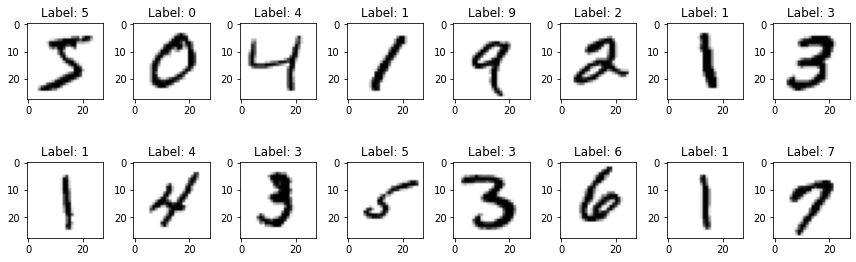

In [2]:
# import matplotlib's pyplot library to visualize MNIST images
import matplotlib.pyplot as plt
%matplotlib inline
# define number of images to show
num_row = 2
num_col = 8
num= num_row*num_col
# get images
images = X_train[0:num]
labels = Y_train[0:num]
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes[i//num_col, i%num_col]
     ax.imshow(images[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

BEFORE:



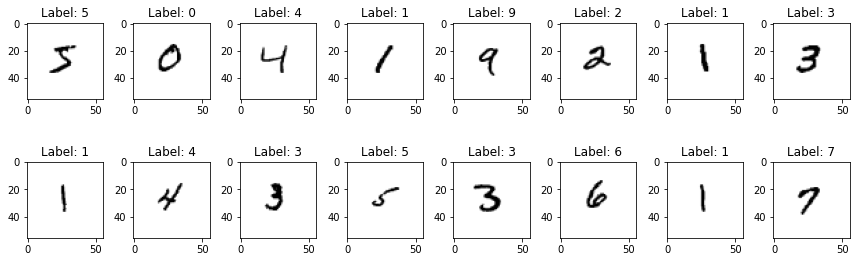

AFTER:



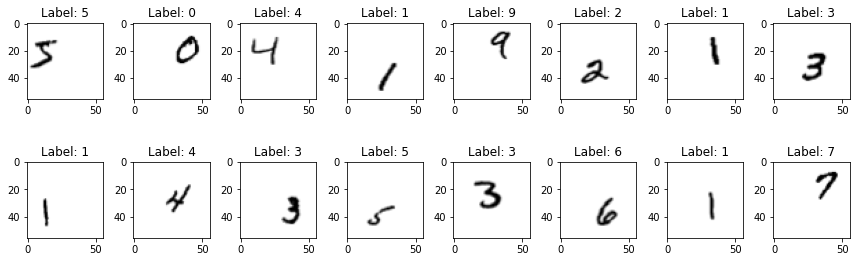

In [3]:
# specify the width and height shift arguments
width_shift_val = 0.25
height_shift_val = 0.25

# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import scipy
import tensorflow as tf

# create the class object
datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=height_shift_val)

#datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

new_shape = (56,56)
X_train_new = np.zeros(shape=(X_train.shape[0],)+new_shape)
for idx in range(X_train.shape[0]):
    #print(X_train[idx].shape[0])
    X_train_new[idx][12: 12 + 28, 12: 12 + 28] = X_train[idx]
    #X_train_new[idx] = tf.image.pad_to_bounding_box(X_train[idx].shape, 12, 12, 56, 56)

# fit the generator
datagen.fit(X_train_new.reshape(X_train_new.shape[0], 56, 56, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE:\n')
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(X_train_new[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(Y_train[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train_new.reshape(X_train_new.shape[0], 56, 56, 1),Y_train.reshape(Y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(56,56), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()